In [63]:
import mnist
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten , Conv1D , MaxPooling1D
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
import numpy as np
import cv2 , os
%matplotlib widget

In [64]:
def show_image(img):
    plt.close()
    plt.imshow(img)
    plt.show

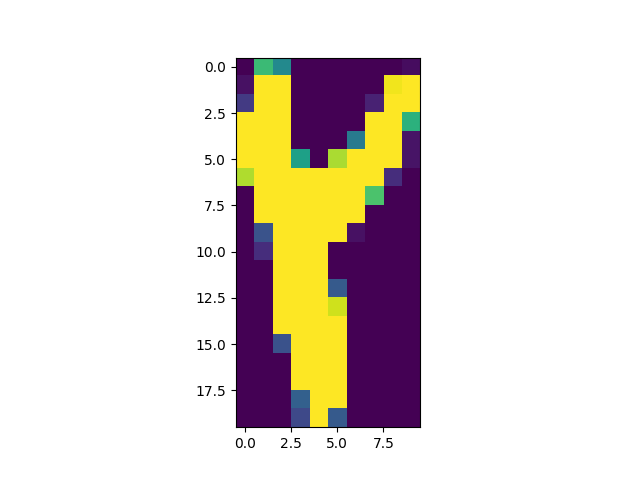

In [65]:
img = cv2.imread("data/2/2 (138).png")
img2_resized = cv2.resize(img, (10, 20))
remove_color = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)
show_image(remove_color)

In [66]:
x = np.empty((0, 20,10))

In [67]:
remove_color.shape

(20, 10)

In [68]:
remove_color.shape

(20, 10)

In [69]:
x = np.append(x, [remove_color], axis=0)

In [70]:
x.shape

(1, 20, 10)

In [71]:
# Add all folders and files to our x and y
x = np.empty((0, 20,10))
y = np.array([])

total_folders = 10
total_files = sum(len(os.listdir(f"data/{str(i)}")) for i in range(0, 10))
processed_files = 0

for folder in range(0, 10):
    folder_str = str(folder)
    folder_files = os.listdir(f"data/{folder_str}")
    
    for file_name in folder_files:
        img = cv2.imread(f"data/{folder_str}/{file_name}")
        img2_resized = cv2.resize(img, (10, 20))
        remove_color = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)
        x = np.append(x, [remove_color], axis=0)
        y = np.append(y, folder)
        
        processed_files += 1
        progress = (processed_files / total_files) * 100
        print(f"\rOverall progress: [{('=' * int(progress // 2)).ljust(50)}] {progress:.1f}%", end="")

print("\nData collection completed.")

Overall progress: [==================================================] 100.0%
Data collection completed.


In [72]:
x.shape

(80000, 20, 10)

In [73]:
y.shape

(80000,)

In [74]:
train_images , test_images , train_labels , test_labels = train_test_split(x , y , test_size=0.2)

In [75]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [76]:
print(train_images.shape)
print(test_images.shape)

(64000, 20, 10)
(16000, 20, 10)


In [77]:
model = Sequential()
model.add(Conv2D(10, kernel_size=(3,3) , activation="relu" , input_shape=(20 ,10 , 1)))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(30 , activation="relu"))
model.add(Dense(10))

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 18, 8, 10)         100       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 4, 10)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 360)               0         
                                                                 
 dense_2 (Dense)             (None, 30)                10830     
                                                                 
 dense_3 (Dense)             (None, 10)                310       
                                                                 
Total params: 11,240
Trainable params: 11,240
Non-trainable params: 0
__________________________________________________

In [79]:
model.compile(optimizer="adam" , loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics=["accuracy"])

In [80]:
train_images.shape

(64000, 20, 10)

In [81]:
h = model.fit(train_images,train_labels,epochs=40,validation_data=(test_images,test_labels))

Epoch 1/40
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2058 - accuracy: 0.9408 - val_loss: 0.0919 - val_accuracy: 0.9729
Epoch 2/40
2000/2000 [==============================] - 2s 1ms/step - loss: 0.0752 - accuracy: 0.9779 - val_loss: 0.0583 - val_accuracy: 0.9837
Epoch 3/40
2000/2000 [==============================] - 2s 1ms/step - loss: 0.0550 - accuracy: 0.9833 - val_loss: 0.0529 - val_accuracy: 0.9851
Epoch 4/40
2000/2000 [==============================] - 2s 1ms/step - loss: 0.0441 - accuracy: 0.9862 - val_loss: 0.0417 - val_accuracy: 0.9874
Epoch 5/40
2000/2000 [==============================] - 2s 1ms/step - loss: 0.0353 - accuracy: 0.9891 - val_loss: 0.0387 - val_accuracy: 0.9881
Epoch 6/40
2000/2000 [==============================] - 2s 1ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0369 - val_accuracy: 0.9881
Epoch 7/40
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0265 - accuracy: 0.9912 - val_loss: 0.0388 - val_accuracy:

In [82]:
model.save('ocr.h5')

In [83]:
test_images.shape

(16000, 20, 10)

In [84]:
out=model.predict(test_images)

500/500 [==============================] - 1s 1ms/step


In [85]:
out.shape

(16000, 10)

In [86]:
out[897]

array([-10.532507 , -15.793976 , -50.180668 , -33.308228 , -22.298086 ,
        34.284786 , -19.221025 , -16.308685 ,  -6.8754015, -16.686836 ],
      dtype=float32)

In [87]:
test_labels[897]

5.0

In [88]:
wheres = 0
maxe = out[897].max()
for i in out[897]:
    if i != maxe:
        wheres += 1
    else:
        print(wheres)


5


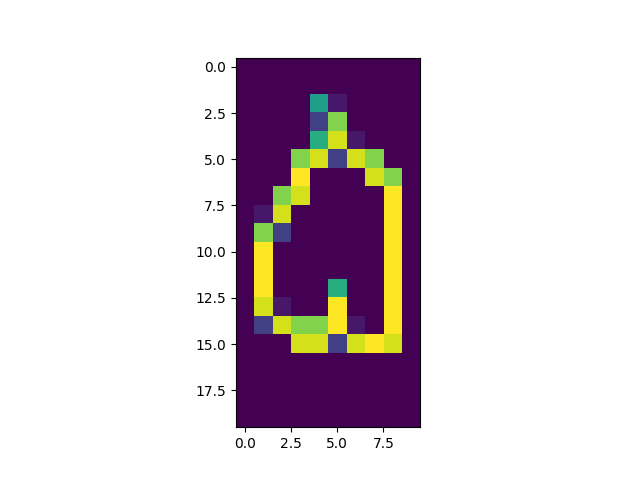

In [100]:
qf = cv2.imread("5test.png")
qf = cv2.cvtColor(qf, cv2.COLOR_BGR2GRAY)
qf = qf / 255

show_image(qf)

In [101]:
test_img5 = cv2.imread("5test.png")
test_img5 = cv2.cvtColor(test_img5, cv2.COLOR_BGR2GRAY)
test_img5 = test_img5 / 255
test_img5 = np.expand_dims(test_img5, axis=0) 
test_img5 = np.expand_dims(test_img5, axis=-1) 

result_test = model.predict(test_img5)


wheres = 0
maxe = result_test[0].max()
for i in result_test[0]:
    if i != maxe:
        wheres += 1
    else:
        
        print("Predicted Number :" , wheres)


1/1 [==============================] - 0s 4ms/step
Predicted Number : 5


In [91]:
test_img5.shape

(1, 20, 10, 1)

In [92]:
phonenumber = cv2.imread("phonenumber.png")
phonenumber_inverted = cv2.bitwise_not(phonenumber)
#phonenumber = np.resize(phonenumber , (20 , 10))
#phonenumber = cv2.cvtColor(phonenumber, cv2.COLOR_BGR2GRAY)
#phonenumber = phonenumber / 255


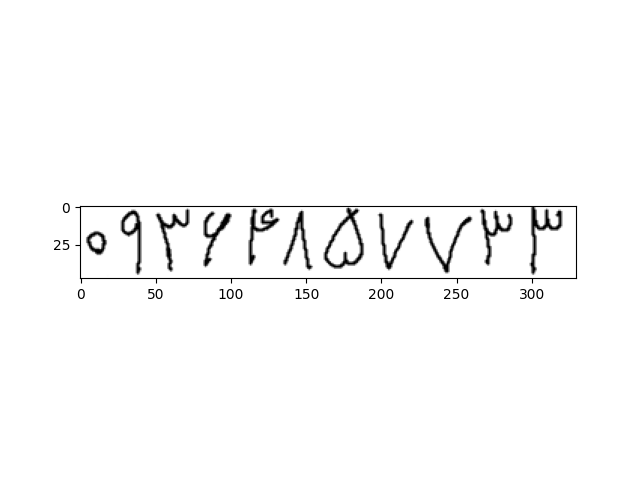

In [99]:
plt.close()
plt.imshow(phonenumber_inverted)
plt.show()

In [94]:
s = 90 - (np.sum(phonenumber_inverted , axis=0 , keepdims=True) / 255)

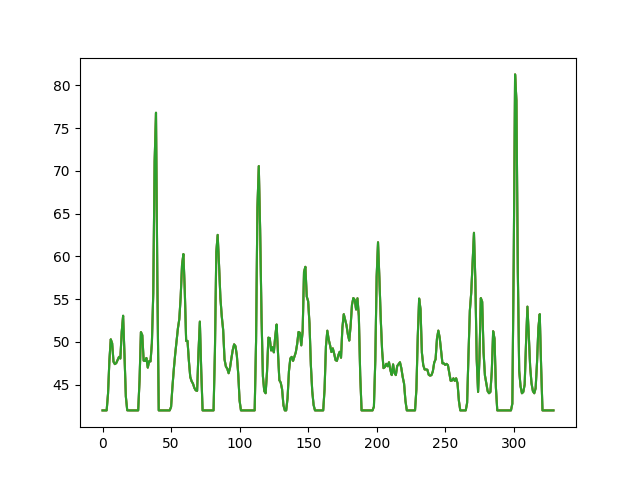

In [98]:
plt.close()
plt.plot(s[0])
plt.show()

ok
1/1 [==============================] - 0s 16ms/step
ok
1/1 [==============================] - 0s 18ms/step
ok
1/1 [==============================] - 0s 17ms/step
ok
1/1 [==============================] - 0s 18ms/step
ok
1/1 [==============================] - 0s 18ms/step
ok
1/1 [==============================] - 0s 18ms/step
ok
1/1 [==============================] - 0s 18ms/step
ok
1/1 [==============================] - 0s 19ms/step
ok
1/1 [==============================] - 0s 19ms/step
ok
1/1 [==============================] - 0s 18ms/step
ok
1/1 [==============================] - 0s 17ms/step


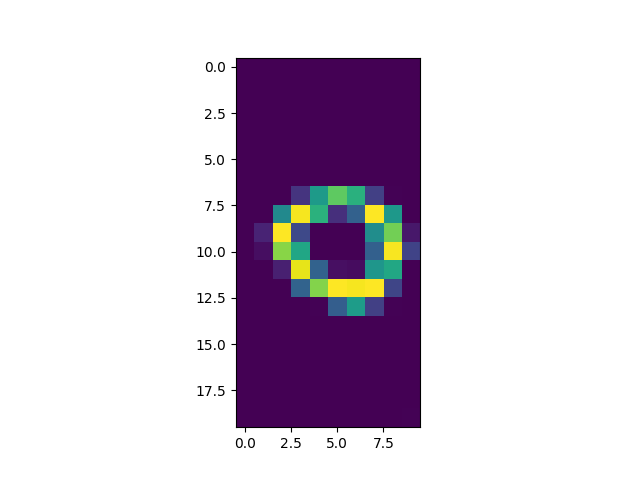

In [96]:
pelak = phonenumber_inverted.copy()
xi = 0
flag1 = False
flag2 = False
xi1 = 0
xi2 = 0
img_array = []
show = True
result = []
wheres = 0
for i in s[0]:
    xi += 1
    if np.all(i > 45) and np.all(i < 90) and flag1 == True and flag2 == False:
        flag2 = True
    if np.all(i < 43): 
        pelak = cv2.line(pelak, (xi, 0), (xi, 90), (0, 0, 255), 1)
        if flag1 == False:
            xi1 = xi

        if flag2 == True:
            xi2 = xi
            flag2 = False
            croped = phonenumber[:,xi1 : xi2]
            cv2.imshow("photo", croped)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
            x1 = np.empty((0 , 1000))
            test_resize = cv2.resize(croped , (10 , 20))
            test_2gray = cv2.cvtColor(test_resize , cv2.COLOR_BGR2GRAY)
            test_2gray = test_2gray / 255
            if show == True:
                show_image(test_2gray)
                zero_test = test_2gray.copy()
                show = False
            else:
                pass
            print("ok")
            test_2gray = np.expand_dims(test_2gray, axis=0) 
            test_2gray = np.expand_dims(test_2gray, axis=-1) 
            custome_test = model.predict(test_2gray)
            result.append(custome_test[0])


            xi1 = xi2
        flag1 = True
    

cv2.imshow("photo", pelak)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
zero_test.shape

(20, 10)

No such comm: b868b649ea9e4ec1a398fe914cc03739


No such comm: 7aada6f6cff34aeab3af3a0f45aadc35
No such comm: 7aada6f6cff34aeab3af3a0f45aadc35


In [ ]:
zero_test = np.expand_dims(zero_test, axis=0) 
zero_test = np.expand_dims(zero_test, axis=-1) 
z_test = model.predict(zero_test)

1/1 [==============================] - 0s 12ms/step


In [ ]:
z_test

array([[-17.601574 , -22.08102  , -12.154622 , -28.336578 ,   9.523429 ,
         -6.1224194,   3.174629 , -27.17656  , -27.091343 ,  -7.6810184]],
      dtype=float32)

In [ ]:
wheres = 0
maxe = z_test[0].max()
for i in z_test[0]:
    if i != maxe:
        wheres += 1
    else:
        
        print("Predicted Number :" , wheres)

Predicted Number : 4


In [ ]:
numbers = ""
for i in result:
    wheres = 0
    maxe = i.max()
    for g in i:
        if g != maxe:
            wheres += 1
        else:
            numbers = numbers+f"{wheres}"
            print("Predicted Number :" , wheres)

Predicted Number : 4
Predicted Number : 2
Predicted Number : 3
Predicted Number : 6
Predicted Number : 4
Predicted Number : 8
Predicted Number : 7
Predicted Number : 7
Predicted Number : 7
Predicted Number : 3
Predicted Number : 3


In [ ]:
numbers

'42364877733'